# 1. Introduction
In this project, I analyzed the UCI Heart Disease dataset to predict whether a person has a risk of developing heart disease based on several health features such as blood pressure, cholesterol levels, maximum heart rate, and others. The main goal of this portfolio is to understand how these factors affect the likelihood of a person suffering from heart disease and develop a machine learning model that can predict the outcome.

# 2. Import Library

In [10]:
# Import basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Import library for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# 3. Loading Dataset

This UCI Heart Disease dataset is taken from a trusted source and contains 14 features, including heart disease diagnosis results. In this section, the dataset is loaded and displays the first few rows to understand the data structure. This helps to get an initial idea of the data to be analyzed. \
You can download the dataset from the following link: [UCI Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease) \
Download the dataset then upload it to google colab or you can click the “Import In Python” button on the web then copy the code displayed. I used the code provided on the web.

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
# Display the first five rows of the features DataFrame
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [4]:
# Display the first five rows of the target variable
y.head()

,num
0,0
1,2
2,1
3,0
4,0


# 4. Dataset Information
At this stage, the dataset is explored further by looking at the data type, data count, and statistical description of each column. This information is important to ascertain whether the dataset is complete, whether there are any data types that need to be changed, and whether there are any outliers that need attention.

In [5]:
# Information about the data
print("\nData Information:")
print(X.info())
print("Data shape:", X.shape)
print("Data description:\n", X.describe())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
None
Data shape: (303, 13)
Data description:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868  

In [6]:
# Information about the target
print("\nTarget Information:")
print(y.info())
print("Number of classes:", len(y['num'].unique()))
print("Target classes:", y['num'].unique())
print("Target distribution:", y['num'].value_counts())


Target Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB
None
Number of classes: 5
Target classes: [0 2 1 3 4]
Target distribution: num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


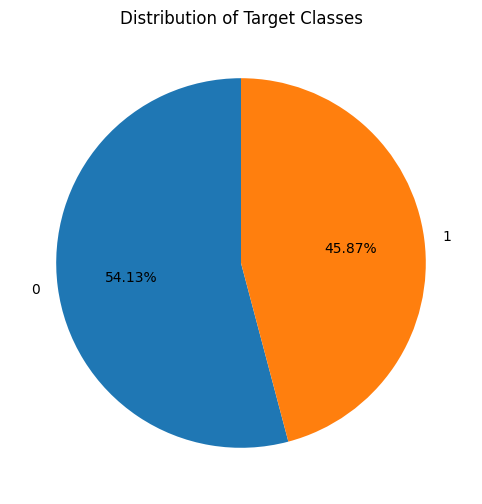

In [11]:
# Plotting the distribution of the target variable as a pie chart
plt.figure(figsize=(8, 6))
y['num'].value_counts().plot.pie(autopct='%.2f%%', startangle=90)
plt.title('Distribution of Target Classes')
plt.ylabel('')
plt.show()

* 0: No heart disease.
* 1, 2, 3, 4: Indicates the presence of heart disease of varying severity.

This program is designed to detect whether or not a person has heart disease, based on available clinical data.
This program does not aim to measure the severity of heart disease or determine the severity category (such as grade 1, 2, 3, or 4). Instead, all heart disease categories (grades 1, 2, 3, and 4) have been combined into a single label of presence of heart disease (1). As such, the model only provides a prediction of healthy or sick, without providing further details regarding the severity of the patient's condition.


<ipython-input-12-6182c2f6014a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['num'] = y['num'].replace({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})


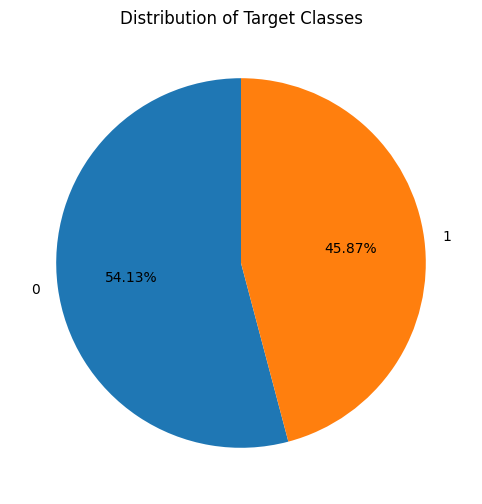

In [12]:
# Convert target to binary: 0 = healthy, 1 = presence of heart disease
y['num'] = y['num'].replace({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

plt.figure(figsize=(8, 6))
y['num'].value_counts().plot.pie(autopct='%.2f%%', startangle=90)
plt.title('Distribution of Target Classes')
plt.ylabel('')
plt.show()

In [13]:
# Check for missing values
print("\nMissing Values Check:")
print("Missing values in X\n:", X.isnull().sum())
print("\nMissing values in y:", y.isnull().sum())


Missing Values Check:
Missing values in X
: age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Missing values in y: num    0
dtype: int64


# 5. Exploratory Data Analysis (EDA)
EDA is the process of visually exploring data to understand patterns, trends, and relationships between features. Several visualizations have been created such as histograms to see the distribution of data, heatmaps to identify correlations between features, and scatterplots to examine the relationship between two variables. EDA helps us find important patterns in the data before proceeding to the machine learning model stage.

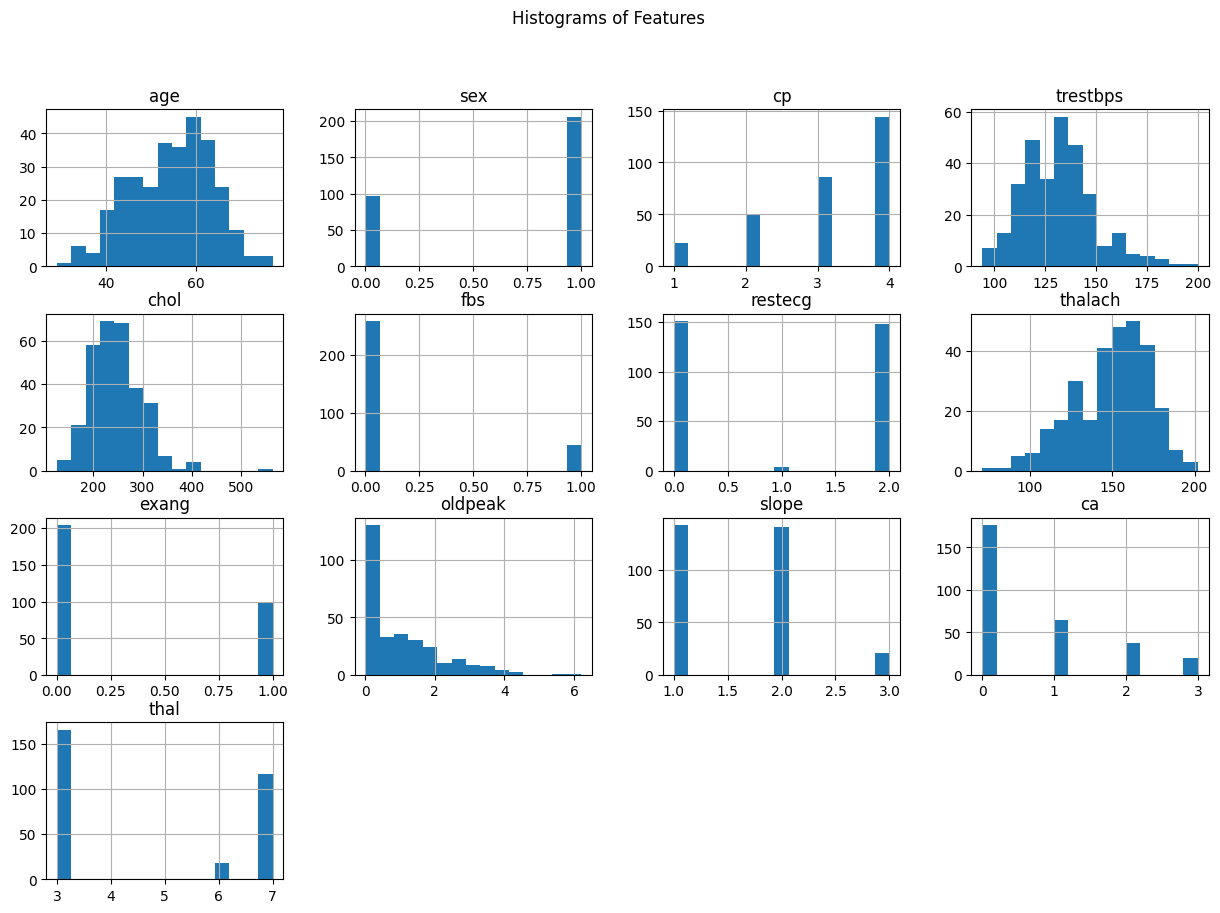

In [14]:
# Plot histograms for each feature
X.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Features')
plt.show()

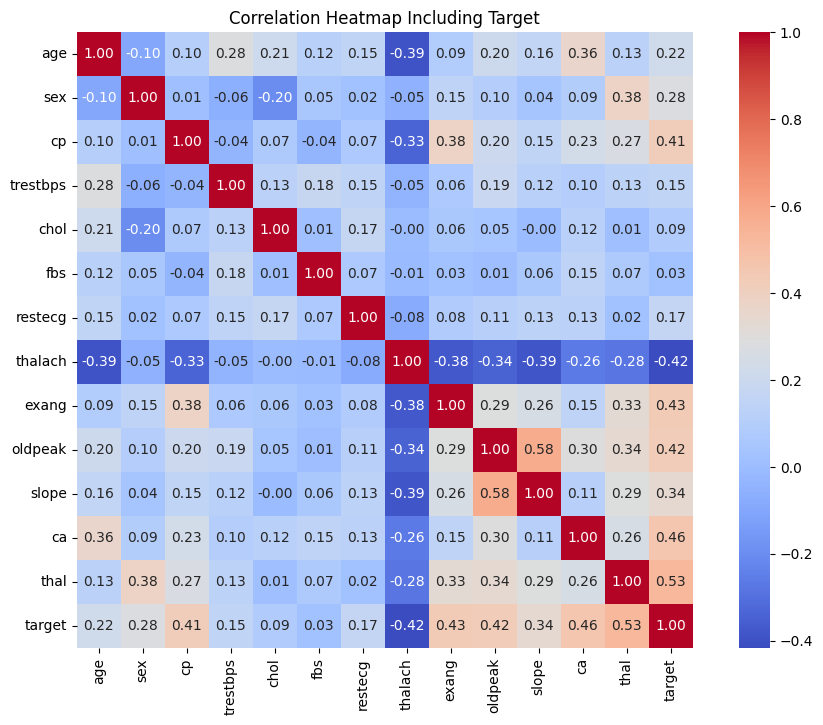

In [15]:
# Merge DataFrame X with target y
X_with_target = X.copy()
X_with_target['target'] = y['num']

# Calculate the correlation matrix
correlation_matrix = X_with_target.corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap Including Target')
plt.show()

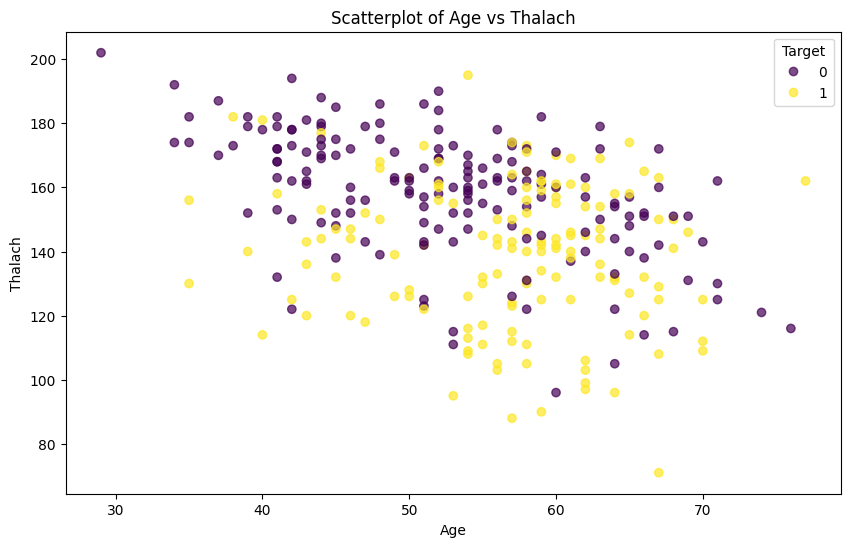

In [20]:
# Example: Scatterplot between two features
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['age'], X['thalach'], c=y['num'], alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Target")
plt.title('Scatterplot of Age vs Thalach')
plt.xlabel('Age')
plt.ylabel('Thalach')

# Show the plot
plt.show()

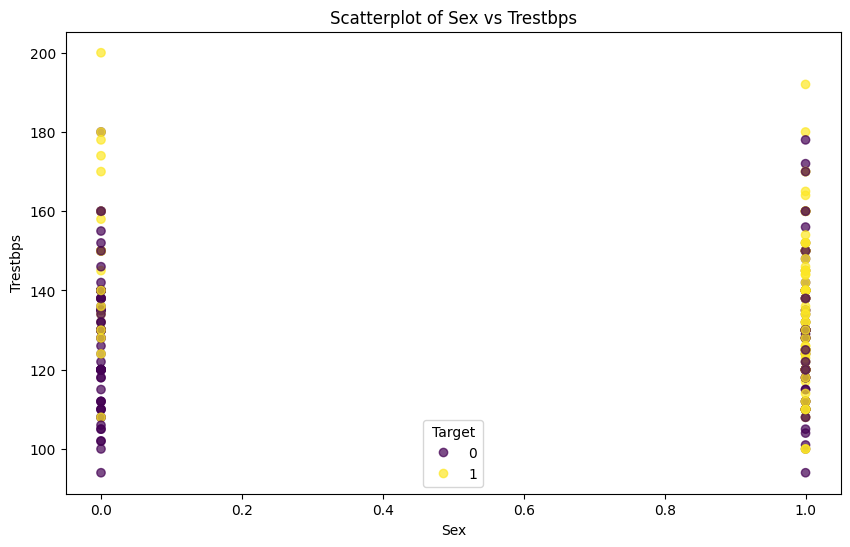

In [21]:
# Example: Scatterplot between two features
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['sex'], X['trestbps'], c=y['num'], alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Target")
plt.title('Scatterplot of Sex vs Trestbps')
plt.xlabel('Sex')
plt.ylabel('Trestbps')

# Show the plot
plt.show()

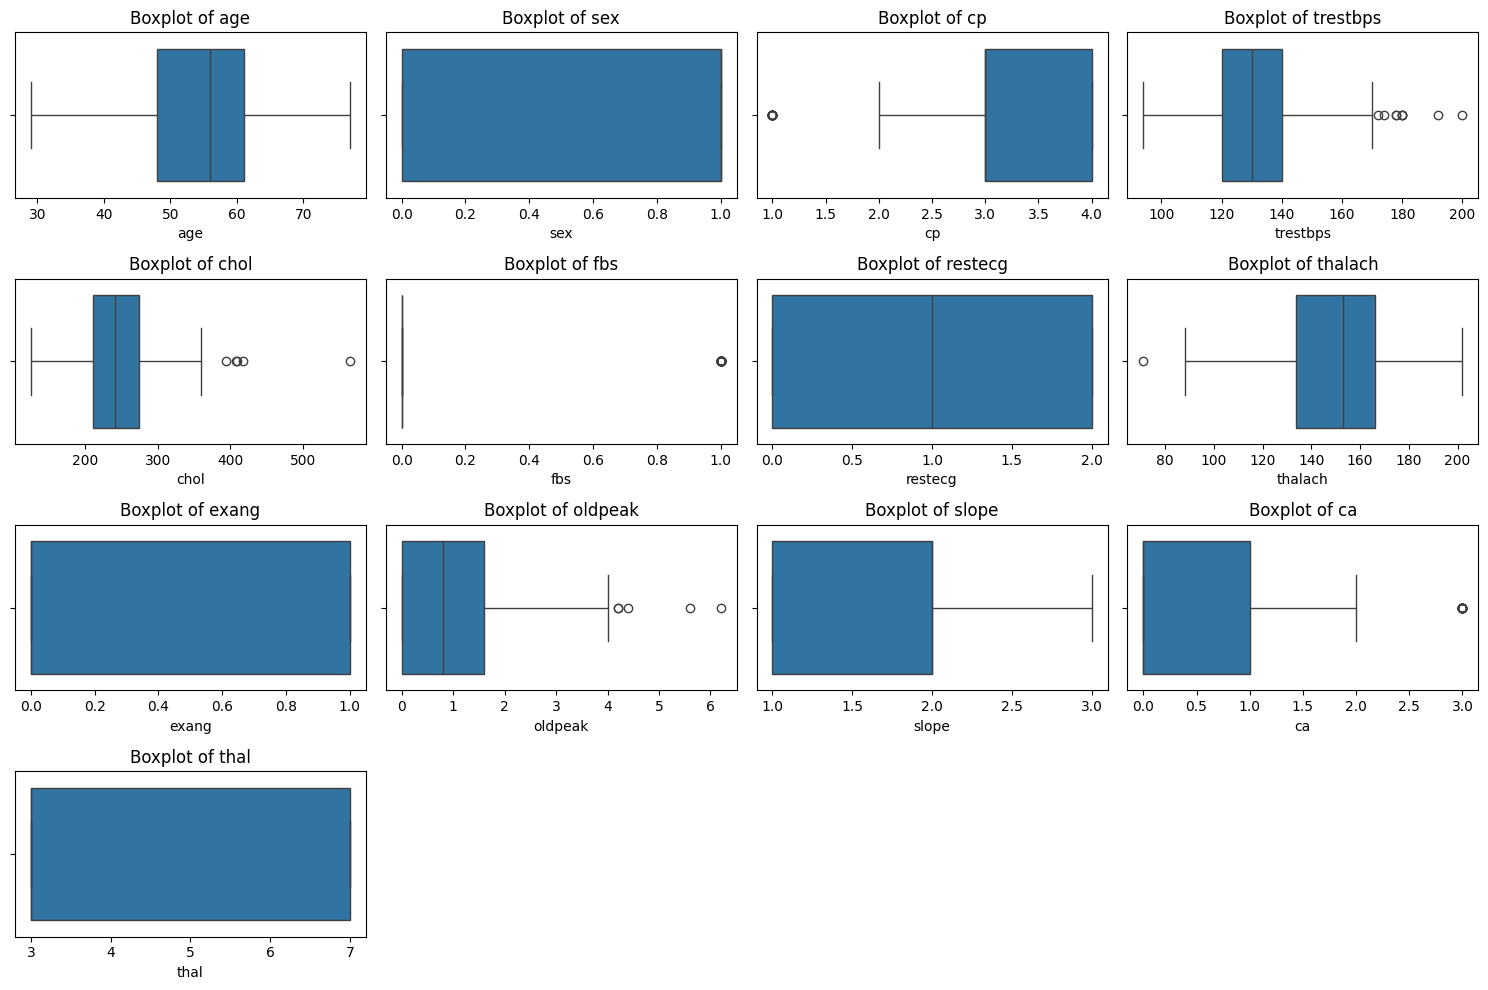

In [22]:
# Boxplots for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=X[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

From the boxplots visualization, there are several features that have outliers, they are: cp, trestbps, chol, fbs, thalach, oldpeak, ca.

# 6. Data Preprocessing
Before building the model, the data must first be processed. This process includes handling missing values and feature normalization. Clean and ready-to-use data will help improve the accuracy of the machine learning models that we will build later.

In [23]:
# Fill empty values in the 'ca' and 'thal' columns
X.fillna({
    'ca': X['ca'].median(),
    'thal': X['thal'].mode()[0]
}, inplace=True)

X.isnull().sum()

<ipython-input-23-57299adb79d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna({


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [24]:
# Splitting Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Feature Normalization using StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [26]:
# Show result
print("Train data after normalization:")
print(X_train_scaled.head())
print("Test Data after normalization:")
print(X_test_scaled.head())

Train data after normalization:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0 -2.838504  0.722504 -1.104690 -0.125982 -0.864142 -0.397360  1.012492   
1  0.241352  0.722504 -0.092057  0.974653 -2.483637  2.516611 -0.995893   
2  1.561291  0.722504 -2.117322  1.524970 -0.241260  2.516611  1.012492   
3  1.121311 -1.384075 -0.092057  1.524970  2.374848 -0.397360  1.012492   
4 -0.308622  0.722504  0.920575 -1.336680 -0.262023  2.516611 -0.995893   

    thalach     exang   oldpeak     slope        ca      thal  
0  2.314470 -0.715891 -0.873573 -0.963432 -0.715869 -0.869161  
1  1.021242 -0.715891 -0.704854 -0.963432  0.401810  1.208241  
2 -0.851710 -0.715891 -0.789214  0.655669  0.401810 -0.869161  
3  0.040172 -0.715891 -0.198698 -0.963432 -0.715869 -0.869161  
4 -0.138205 -0.715891 -0.789214 -0.963432  2.637167  1.208241  
Test Data after normalization:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0 -0.198627  0.722504 -0.09

# 7. Feature Selection
At this stage, I performed feature selection to identify the most relevant features in predicting whether someone has heart disease or not. Given that the UCI Heart Disease dataset has 14 input features, not all features may have a significant contribution to the model performance. Therefore, feature selection was performed using ANOVA F-test for classification. \

ANOVA (Analysis of Variance) F-test is one of the filter methods that evaluates the relevance of each feature to the target variable individually, i.e. by looking at the between-group variation generated by the feature against the target (label). A high F-test value indicates that the feature has a strong relationship with the target, so this feature is likely to improve model performance.

Selected features based on ANOVA:
Index(['cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


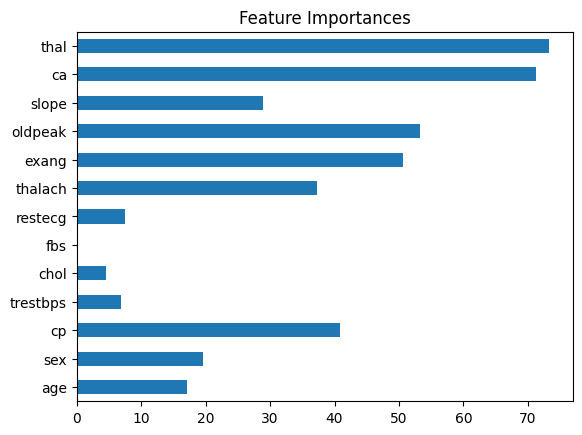

In [27]:
# Using SelectKBest to select the best features based on ANOVA
# Suppose we want to select the 6 best features
selector = SelectKBest(score_func=f_classif, k=6)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Get the selected features
selected_features = selector.get_support(indices=True)
selected_feature_names = X_train_scaled.columns[selected_features]

# Display the result
print("Selected features based on ANOVA:")
print(selected_feature_names)

feat_importances = pd.Series(selector.scores_, index=X.columns)
feat_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()

# 8. Machine Learning Model Building
After feature selection, the next step is to build several Machine Learning models to predict whether a person has heart disease based on the selected features. In this section, we will use four classification algorithms that are commonly used in the case of heart disease prediction:

1. Logistic Regression

Logistic Regression is a simple yet powerful classification model. Although it is essentially a linear model, Logistic Regression is suitable for predicting binary categories, as in this case, predicting whether a person has heart disease or not. The model has good interpretability, as each coefficient of the feature used can indicate the influence of that feature on the prediction result. This makes Logistic Regression ideal for getting clear and accurate insights from data.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


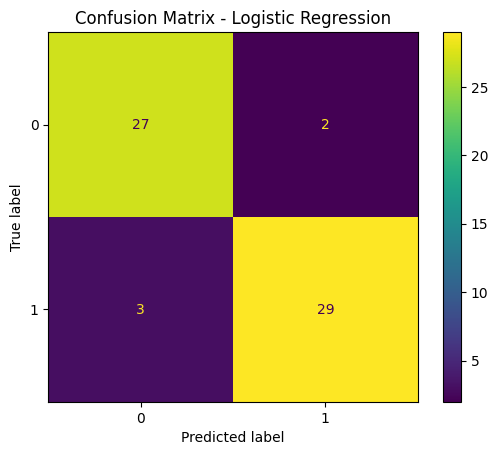

In [28]:
# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_selected, y_train)

# Predicting test data
y_pred_lr = lr_model.predict(X_test_scaled[selected_feature_names])

# Display confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

2. Random Forest Classification

Random Forest is an ensemble learning method that consists of multiple decision trees trained on different subsets of data. The final decision is made based on the majority result of all the trees built. The advantage of Random Forest is its ability to handle many features and mitigate the risk of overfitting. It also gives us insight into the importance of each feature in prediction through feature importance, which will help us understand the key factors in heart disease diagnosis.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


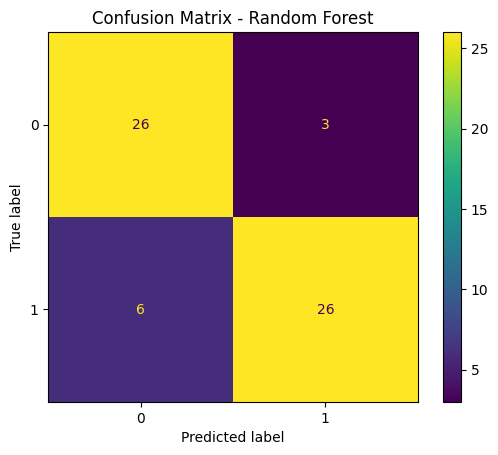

In [29]:
# Training the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_selected, y_train)

# Predicting test data
y_pred_rf = rf_model.predict(X_test_scaled[selected_feature_names])

# Display confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

3. XGBoost Classification

XGBoost (Extreme Gradient Boosting) is a very powerful tree-based boosting algorithm. XGBoost works by incrementally building multiple decision trees, where each subsequent tree corrects the mistakes made by the previous tree. This algorithm is known to be efficient and accurate, and has the ability to handle imbalanced data and overfitting. In this case, XGBoost will help maximize predictions by suppressing frequent prediction errors.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:09:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


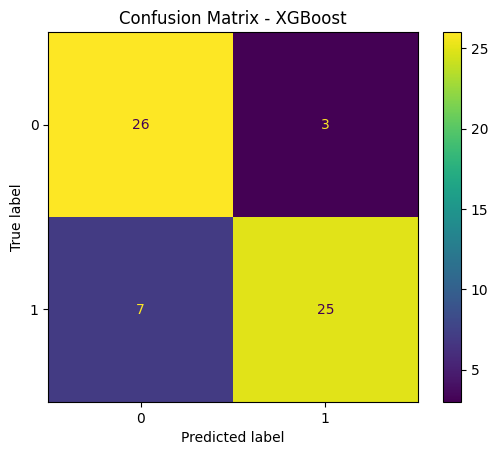

In [30]:
# Training the XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_selected, y_train)

# Predicting test data
y_pred_xgb = xgb_model.predict(X_test_scaled[selected_feature_names])

# Display confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm_xgb).plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()

4. Neural Network Classification

Neural networks are learning algorithms inspired by how the human brain works. Neural networks are well suited to handle complex datasets with many features as they are able to capture non-linear relationships between features. In the context of heart disease prediction, Neural Network can utilize the complexity of the relationships between variables to provide more accurate predictions. This model is often used when we have large data or patterns that are difficult to capture by linear models.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


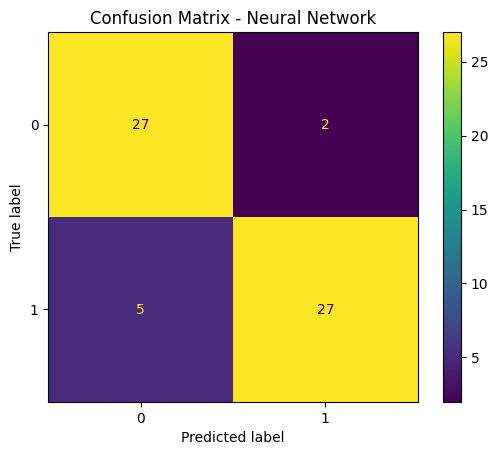

In [31]:
# Training the Neural Network
nn_model = MLPClassifier(max_iter=1000)
nn_model.fit(X_train_selected, y_train)

# Predicting test data
y_pred_nn = nn_model.predict(X_test_scaled[selected_feature_names])

# Display confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
ConfusionMatrixDisplay(cm_nn).plot()
plt.title("Confusion Matrix - Neural Network")
plt.show()

# 9. Model Evaluation

In this section, we will evaluate the performance of the built model using various evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. We will also display the ROC curve to see how the model classifies patients with and without heart disease. A good evaluation will give an idea of the reliability of the model.


In [32]:
# Logistic Regression Model Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1-Score: {f1_lr:.2f}\n")

Logistic Regression Model Evaluation:
Accuracy: 0.92
Precision: 0.94
Recall: 0.91
F1-Score: 0.92



In [33]:
# Random Forest Model Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}\n")

Random Forest Model Evaluation:
Accuracy: 0.85
Precision: 0.90
Recall: 0.81
F1-Score: 0.85



In [34]:
# XGBoost Model Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1-Score: {f1_xgb:.2f}\n")

XGBoost Model Evaluation:
Accuracy: 0.84
Precision: 0.89
Recall: 0.78
F1-Score: 0.83



In [35]:
# Neural Network Model Evaluation
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print("Neural Network Model Evaluation:")
print(f"Accuracy: {accuracy_nn:.2f}")
print(f"Precision: {precision_nn:.2f}")
print(f"Recall: {recall_nn:.2f}")
print(f"F1-Score: {f1_nn:.2f}\n")

Neural Network Model Evaluation:
Accuracy: 0.89
Precision: 0.93
Recall: 0.84
F1-Score: 0.89



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


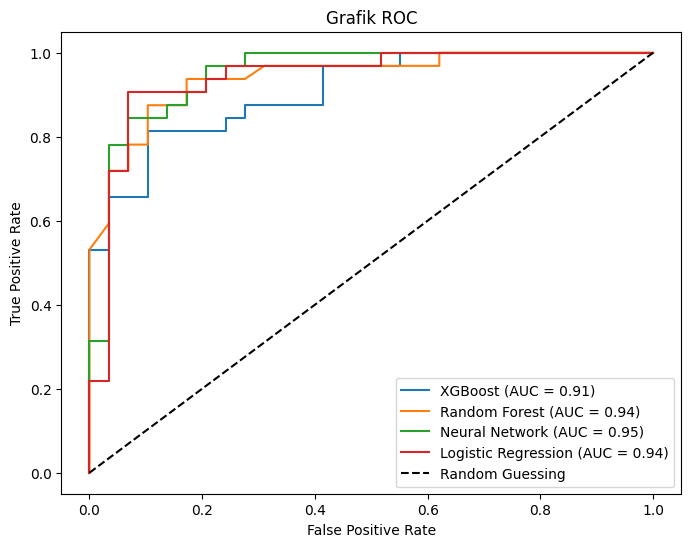

In [36]:
# Calculating ROC AUC for each model
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled[selected_feature_names])[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled[selected_feature_names])[:, 1])
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_model.predict_proba(X_test_scaled[selected_feature_names])[:, 1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_scaled[selected_feature_names])[:, 1])

auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_rf = auc(fpr_rf, tpr_rf)
auc_nn = auc(fpr_nn, tpr_nn)
auc_lr = auc(fpr_lr, tpr_lr)

# Creating a ROC chart
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Grafik ROC')
plt.legend(loc='lower right')
plt.show()

Neural Network was chosen because compared to Logistic Regression, the overall performance of Neural Network is better, especially in AUC-ROC (0.96 vs. 0.94), which shows stronger discrimination ability at various thresholds. Although the differences in other metrics such as accuracy, precision, recall, and F1-score are not significant, Neural Network also has the ability to capture non-linear relationships between more complex features, making it a stronger choice for this data.

In [122]:
# Defining grid parameters for tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Hidden layer size
    'activation': ['tanh', 'relu'],  # Activation function
    'solver': ['adam', 'sgd'],  # Solver for optimization
    'alpha': [0.0001, 0.001, 0.01],  # Regularization
    'learning_rate': ['constant', 'adaptive'],  # Learning rate type
    'max_iter': [500, 1000],  # Maximum number of iterations
}

# MLPClassifier model initialization
nn_model = MLPClassifier()

# GridSearchCV Initialization
grid_search_nn = GridSearchCV(estimator=nn_model, param_grid=param_grid,
                               scoring='f1', cv=5, n_jobs=-1, verbose=1)

# Training the model with GridSearchCV
grid_search_nn.fit(X_train_selected, y_train)

# Showing the best results
print("Best parameters found: ", grid_search_nn.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search_nn.best_score_))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'}
Best cross-validation accuracy: 0.80


**Notes**: The results of this grid search may vary depending on the random initialization used by the model. Since `random_state` is not specified in the grid parameters, the results obtained may not be consistent each time the code is run. To ensure reproducibility of results, it is recommended to include `random_state` in the grid parameters in the future. In the next code, I used the parameters I got when running the grid search and I also added `random_state` so that the results obtained are consistent.

In [123]:
best_nn_model = MLPClassifier(activation='tanh',
                              alpha=0.001,
                              hidden_layer_sizes=(50,),
                              learning_rate='adaptive',
                              max_iter=1000, solver='sgd',
                              random_state=6)
# Train the model on the training data
best_nn_model.fit(X_train_selected, y_train)

# Prediction on training data
y_pred_train = best_nn_model.predict(X_train_selected)

# Model evaluation on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Predictions on test data
y_pred_test = best_nn_model.predict(X_test_scaled[selected_feature_names])

# Model evaluation on test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Display evaluation results
print("Model Evaluation on Training Data:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1-Score: {f1_train:.2f}\n")

print("Model Evaluation on Test Data:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1-Score: {f1_test:.2f}\n")

# Compare accuracy
if accuracy_train - accuracy_test > 0.1:
    print("The model may have overfitting.")
else:
    print("The model shows no signs of overfitting.")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Evaluation on Training Data:
Accuracy: 0.83
Precision: 0.85
Recall: 0.75
F1-Score: 0.80

Model Evaluation on Test Data:
Accuracy: 0.92
Precision: 0.94
Recall: 0.91
F1-Score: 0.92

The model shows no signs of overfitting.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


After tuning, the performance of the Neural Network model has increased significantly. The accuracy value increased from 0.89 to 0.92, precision from 0.93 to 0.94, recall increased from 0.84 to 0.91, and F1-score increased from 0.89 to 0.92. This increase shows that the model after tuning is able to provide more accurate and balanced predictions in detecting heart disease cases.

# 10. New Data Prediction

In [124]:
# Example of new data for prediction (replace with your data)
# Ensure that the new data has the same features as the selected one, i.e.: ['cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

# If this code is executed it should detect 1
new_data = np.array([[4, 130, 1, 6.2, 4, 7]])

# If this code is executed it should detect 0
# new_data = np.array([[0, 160, 0, 0, 0, 3]])

scaler = StandardScaler()
scaler.fit(X_train_selected)
new_data_scaled = scaler.transform(new_data)

# Make predictions
new_prediction = best_nn_model.predict(new_data_scaled)

# Getting the prediction probability
probabilities = best_nn_model.predict_proba(new_data_scaled)

# Display prediction results and probabilities
print("Prediction for new data:", new_prediction)
print("Prediction probability:", probabilities)

Prediction for new data: [1]
Prediction probability: [[0.42073543 0.57926457]]


The model that has been created can detect data on people who are detected to have the possibility of heart disease and healthy people from the specified data. You can replace `new_data` to try detecting other data.

In people with heart disease, attribute values from the UCI Heart Disease dataset tend to look like this:

* cp (chest pain type): Values 1 to 3 (typical angina, atypical angina, non-anginal pain), value 4 (asymptomatic) is more severe.
* thalach (max heart rate): A low value (usually below 140 bpm) indicates a worse condition.
* exang (exercise-induced angina): A value of 1 indicates exercise-induced angina (worse).
* oldpeak (ST depression): High values (more than 2.0) are more severe.
* ca (number of major vessels colored): Values 1 to 4, the higher the more severe.
* thal (thalassemia): Values 3 (normal), 6 (fixed defect), 7 (reversible defect); values 6 and 7 are more severe.

In a healthy person (no heart disease), the attribute values are usually like this:

* cp (chest pain type): Value 0 (no chest pain).
* thalach (max heart rate): High value (usually above 150 bpm).
* exang (exercise-induced angina): Value 0 (no angina during exercise).
* oldpeak (ST depression): Low value (close to 0).
* ca (number of major vessels colored): Value 0 (no narrowing of vessels).
* thal (thalassemia): Value 3 (normal).

# 11. Conclusion

The model that has been built is able to predict well whether a person has the possibility of heart disease or healthy based on the given data. However, during Grid Search, I forgot to add random_state, so the best parameters may differ each time the model is run. To resolve this, random_state has been added to the final model to ensure consistent results.

Development Suggestion:

1. Re-run Grid Search: Re-run Grid Search with random_state to make the optimal parameters more stable.
2. Cross-validation: Use more comprehensive cross-validation to ensure the model works consistently on various subsets of data.
3. Advanced Hyperparameter Tuning: Perform additional tuning using methods such as Bayesian Optimization for more efficient tuning results.
4. Feature Engineering: Develop additional features or perform polynomial feature transformation to improve prediction accuracy.